# Peer-graded Assignment: Описательный анализ данных

Часто при работе с пользовательскими данными приходится сталкиваться с тем, что данные предоставляются для работы без описания. При этом не известно, что содержательно представляют собой те или иные признаки, а известны лишь их типы: числовые, категориальные, номинальные переменные. Такие ситуации - не редкость при работе с «чувствительными» данными, например, в сфере банковской аналитики, HR-аналитики, сфере телекоммуникаций, страхования, здравоохранения, недвижимости или ритейла. Тем не менее, с такими данным нужно уметь работать, и нужно уметь проводить на них классические этапы анализа, в частности описательный анализ данных и визуализацию. Именно этим мы займемся на первой неделе.


В этом задании мы потренируемся делать описательный анализ и визуализацию так называемых «закрытых» данных - данных, которые предоставляются для анализа и построения моделей без описания. Выборка, с которой мы будем работать прилагается.

* Метки классов (здесь `1` соответствует классу `отток`, `-1` - классу `не отток`) – `orange_small_churn_labels.train`
* Данные (предоставлены без описания, однако известно, что первые 190 переменных являются числовыми, а оставшиеся 40 - категориальными) – `orange_small_churn_data.train`

Скачайте файлы [на странице задания] и переходите к выполнению задачи! Результатом выполнения задания является jupyter notebook. Перед отправкой результата убедитесь, что вы выполнили все пункты из задания и это можно понять из вашего notebook'а. Проверьте, что код написан понятно и аккуратно - это поможет вашим сокурсником лучше понять, что вы сделали, и оценить вашу работу.

## Инструкции

1\. Загрузите данные `orange_small_churn_data.train` и `orange_small_churn_labels.train`

In [1]:
# !unzip data.zip

In [2]:
# !pip3 install --upgrade pandas

In [3]:
import pandas as pd
import os
import numpy as np

import seaborn as sns
sns.set()
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (13, 8)

import warnings
warnings.filterwarnings('ignore')

PATH_TO_DATA = 'data'

In [4]:
df_train = pd.read_csv(os.path.join(PATH_TO_DATA, 'orange_small_churn_data.train'))
df_train

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,3052.0,NaN,NaN,NaN,NaN,...,Al6ZaUT,vr93T2a,LM8l689qOp,NaN,NaN,fKCe,02N6s8f,xwM2aC7IdeMC0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,1813.0,7.0,NaN,NaN,NaN,...,oslk,6hQ9lNX,LM8l689qOp,NaN,ELof,xb3V,RAYp,55YFVY9,mj86,NaN
2,NaN,NaN,NaN,NaN,NaN,1953.0,7.0,NaN,NaN,NaN,...,zCkv,catzS2D,LM8l689qOp,NaN,NaN,FSa2,ZI9m,ib5G6X1eUxUn6,mj86,NaN
3,NaN,NaN,NaN,NaN,NaN,1533.0,7.0,NaN,NaN,NaN,...,oslk,e4lqvY0,LM8l689qOp,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,686.0,7.0,NaN,NaN,NaN,...,oslk,MAz3HNj,LM8l689qOp,NaN,NaN,WqMG,RAYp,F2FyR07IdsN7I,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,NaN,NaN,NaN,NaN,NaN,938.0,7.0,NaN,NaN,NaN,...,oslk,8xSqDjb,LM8l689qOp,NaN,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86,NaN
39996,NaN,NaN,NaN,NaN,NaN,1750.0,7.0,NaN,NaN,NaN,...,oslk,WUmqPCU,LM8l689qOp,NaN,NaN,WqMG,RAYp,F2FyR07IdsN7I,NaN,NaN
39997,NaN,NaN,NaN,NaN,NaN,1204.0,7.0,NaN,NaN,NaN,...,oslk,pHOw_BK,LM8l689qOp,NaN,ELof,WqMG,RAYp,F2FyR07IdsN7I,am7c,NaN
39998,NaN,NaN,NaN,NaN,NaN,8232.0,14.0,NaN,NaN,NaN,...,oslk,WC7Esaq,LM8l689qOp,NaN,NaN,wX53,RAYp,F2FyR07IdsN7I,NaN,NaN


In [5]:
labels_train = pd.read_csv(os.path.join(PATH_TO_DATA, 'orange_small_churn_labels.train'), header=None, squeeze=True)
labels_train

0       -1
1       -1
2       -1
3        1
4       -1
        ..
39995   -1
39996   -1
39997   -1
39998   -1
39999   -1
Name: 0, Length: 40000, dtype: int64

Удалим полностью NaN колонки

In [6]:
df_train.dropna(axis=1, how='all', inplace=True)

In [7]:
df_train['target'] = labels_train

2\. Рассчитайте доли классов `отток` и `не отток`.

Абсолютные значения:

In [8]:
labels_train.value_counts()

-1    37024
 1     2976
Name: 0, dtype: int64

Доли:

In [9]:
labels_train.value_counts(normalize=True)

-1    0.9256
 1    0.0744
Name: 0, dtype: float64

- отток: 7,4%
- не отток: 92,6%

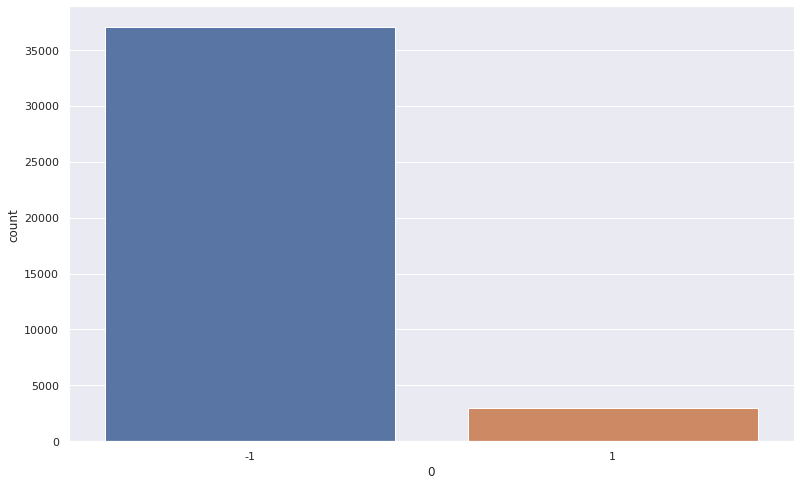

In [10]:
sns.countplot(x=labels_train);

3\. Рассчитайте корреляции переменных с целевой функцией и проанализируйте полученные данные.

Обратите внимание на то, что целевая функция предсталвляет собой бинарную переменную. Теоретически, это не помешает рассчиать, например, корреляцию Пирсона между непрерывной переменной и целевой функцией, онднако анализиоовать полученные результаты будет сложно, корреляция Пирсона просто не рассчитана на такое применение. Кто уже забыл, как действовать в такой ситуации - вспоминить можно вот здесь: https://stepik.org/lesson/90035/step/3?unit=66281 

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 213 entries, Var1 to target
dtypes: float64(173), int64(2), object(38)
memory usage: 65.0+ MB


In [12]:
not_nans = df_train.describe().loc['count'].sort_values()

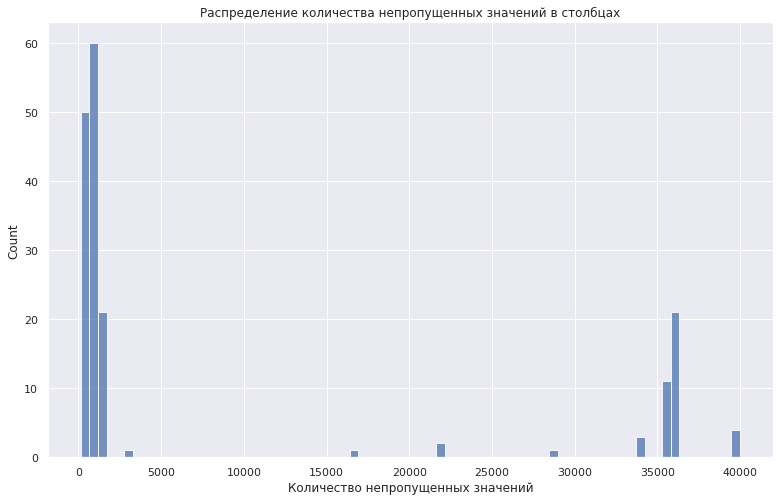

In [13]:
sns.histplot(not_nans);
plt.title('Распределение количества непропущенных значений в столбцах')
plt.xlabel('Количество непропущенных значений');

In [14]:
not_nans.median(), not_nans.mean()

(1006.0, 9242.965714285714)

Построим boxplot'ы для 10 столбцов с максимальным количеством NaN'ов

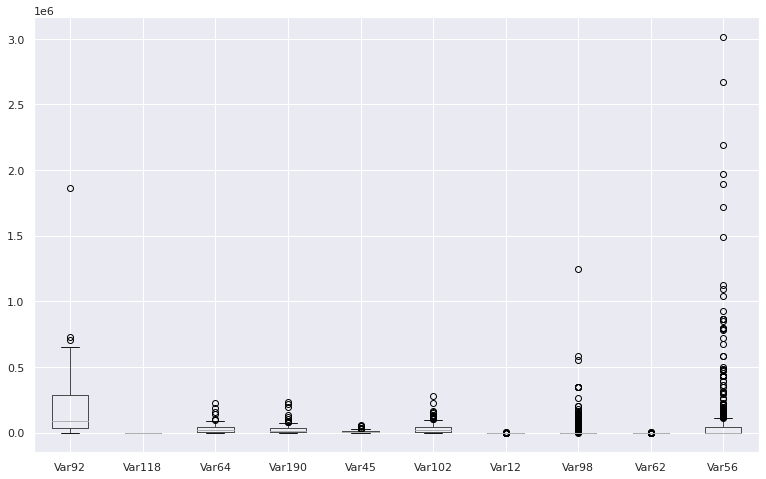

In [15]:
df_train.boxplot(column=not_nans[:10].index.to_list());

Построим boxplot'ы для 10 столбцов с минимальным количеством NaN'ов

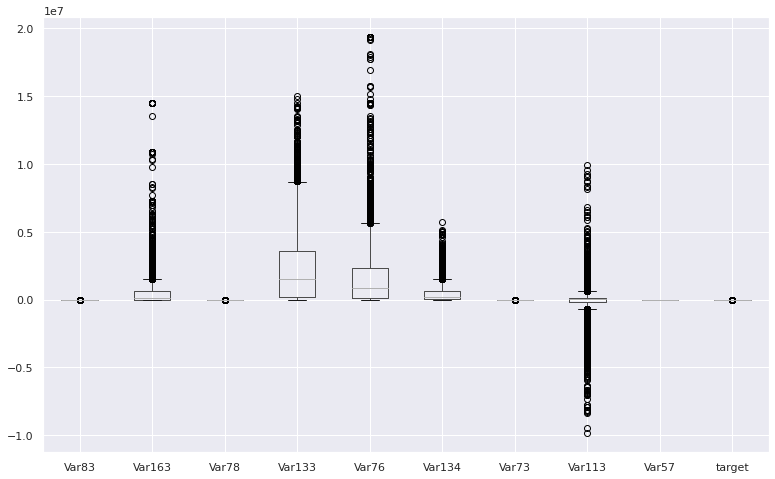

In [16]:
df_train[not_nans[-10:].index].boxplot();

Пример одного столбца с разбиением по целевой переменной

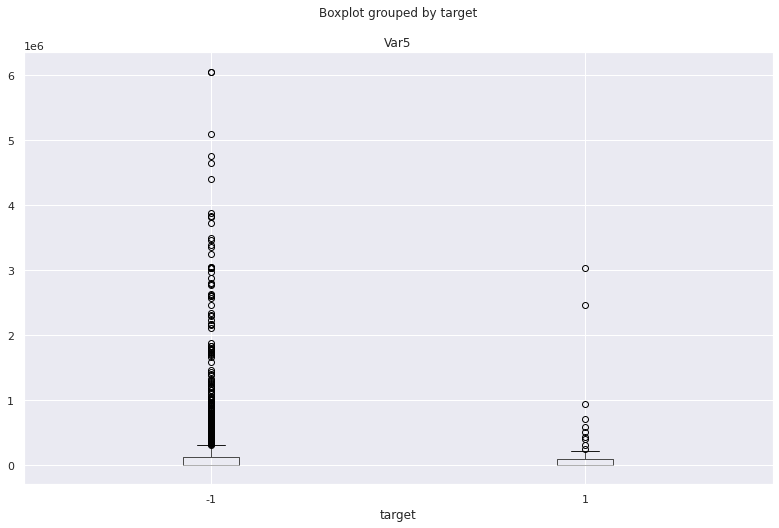

In [17]:
df_train.boxplot(column=['Var5'], by='target');

Для расчёта корреляции непрерывных признаков с бинарной целевой переменной используем следующий подход: раcсчитаем средние значения в каждом столбце с учётом значения целевой переменной.

Далее сравним средние значения и разность будем считать величиной корреляции.

In [18]:
medians = df_train.groupby('target').median()
medians

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var9,Var10,Var11,...,Var180,Var181,Var182,Var183,Var184,Var186,Var187,Var188,Var189,Var190
target,,,,,,,,,,,,,,,,,,,,,
-1,0.0,0.0,0.0,0.0,0.0,861.0,7.0,20.0,0.0,8.0,...,2419200.0,0.0,101583.0,0.0,0.0,0.0,4.0,193.98,270.0,12668.94
1,8.0,0.0,0.0,0.0,0.0,791.0,7.0,34.0,0.0,8.0,...,4194547.0,0.0,390504.0,0.0,0.0,0.0,6.0,241.14,222.0,8615.25


In [19]:
means = df_train.groupby('target').mean()
means

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var9,Var10,Var11,...,Var180,Var181,Var182,Var183,Var184,Var186,Var187,Var188,Var189,Var190
target,,,,,,,,,,,,,,,,,,,,,
-1,10.900935,0.005181,436.173237,0.147541,252273.706041,1335.855240,6.923846,47.121495,376455.246168,8.564315,...,3.804263e+06,0.609007,1.404086e+06,80083.852850,7.307772,3.543925,15.891589,162.883275,273.622350,22970.571361
1,12.571429,0.000000,268.390244,0.163636,185323.839286,1130.382022,5.217486,53.085714,478212.107143,8.195122,...,4.124426e+06,0.629975,1.342472e+06,94627.219512,10.048780,3.085714,18.571429,217.478049,233.422713,17753.648824


In [20]:
corrs = (means.loc[1] - means.loc[-1])

4\. Визуализируйте данные: рассмотрите топ 20 числовых переменных, наиболее сильно коррелирующих с целевой функцией. Для этих переменных постройте:
* Распределения в разрезе классов
* Отобразите объекты в координатах пар признаков

In [21]:
top_correlated_pos = corrs.sort_values(ascending=False)[:20]
top_correlated_pos

Var131    1.034608e+07
Var69     4.808584e+05
Var53     4.389077e+05
Var177    4.017487e+05
Var180    3.201630e+05
Var114    2.416347e+05
Var111    1.931651e+05
Var113    1.628422e+05
Var153    1.514534e+05
Var10     1.017569e+05
Var139    9.586470e+04
Var38     7.767100e+04
Var36     5.799337e+04
Var76     5.678068e+04
Var150    4.557850e+04
Var162    4.456118e+04
Var86     4.061467e+04
Var70     3.612266e+04
Var149    2.953667e+04
Var134    1.494272e+04
dtype: float64

In [22]:
top_correlated_neg = corrs.sort_values(ascending=True)[:20]
top_correlated_neg

Var154   -141731.558879
Var59    -130636.055601
Var124   -122003.961848
Var33     -98084.971292
Var5      -66949.866756
Var182    -61614.779285
Var92     -57588.459712
Var108    -45158.474766
Var171    -41570.366126
Var37     -37952.494337
Var136    -30731.860254
Var56     -22094.825620
Var80     -17711.523364
Var94      -9689.091445
Var106     -9118.277347
Var165     -8230.840216
Var95      -8222.666903
Var117     -7494.656334
Var125     -5315.396947
Var190     -5216.922538
dtype: float64

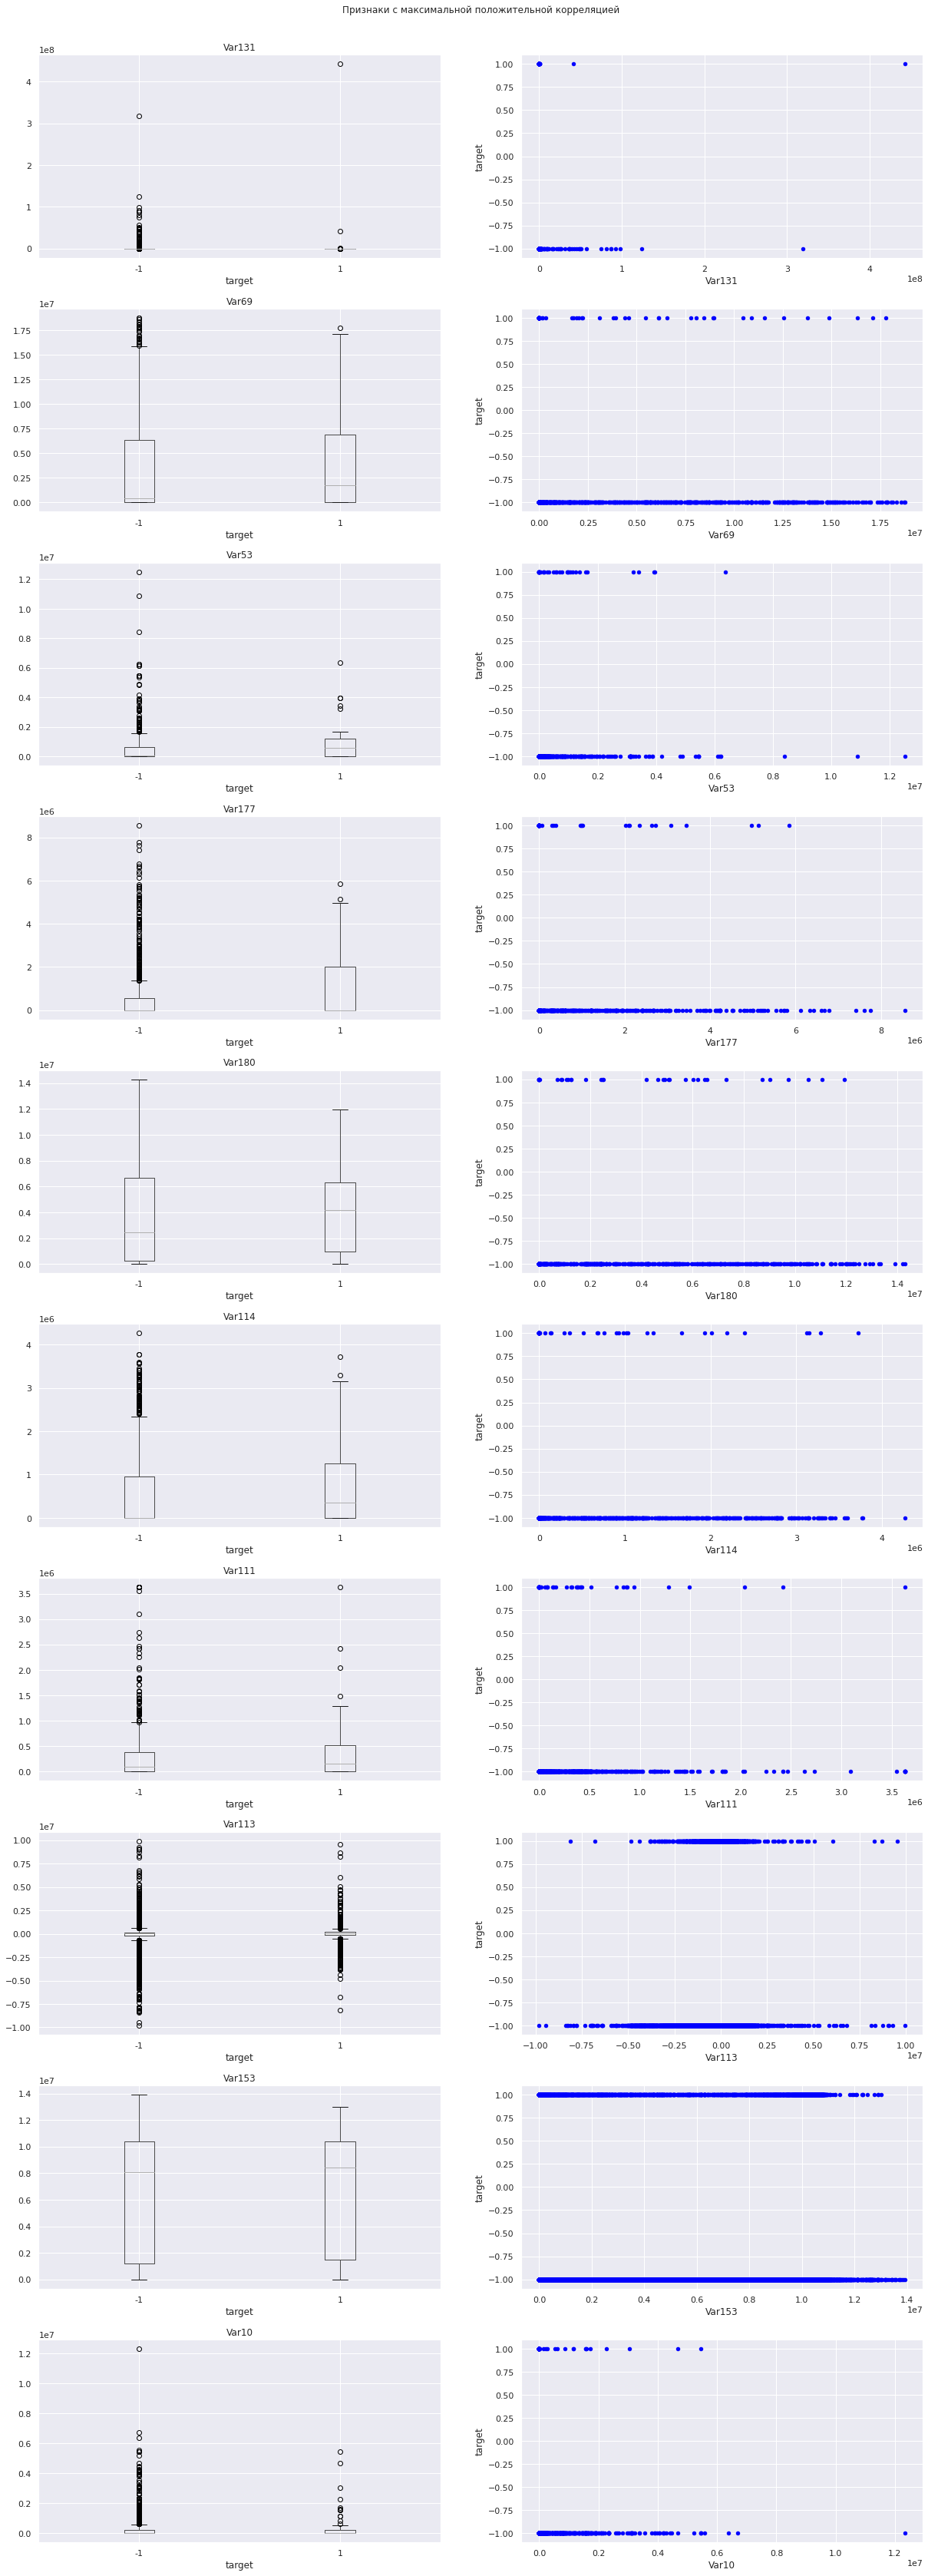

In [23]:
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(20, 60))
fig.subplots_adjust(hspace=0.25)
for i, ax in enumerate(axes):
    col = top_correlated_pos.index.to_list()[i]
    df_train.boxplot(column=col, by='target', ax=ax[0])
    df_train.plot.scatter(x=col, y='target', ax=ax[1], color='blue')
fig.suptitle('Признаки с максимальной положительной корреляцией', y=0.915);

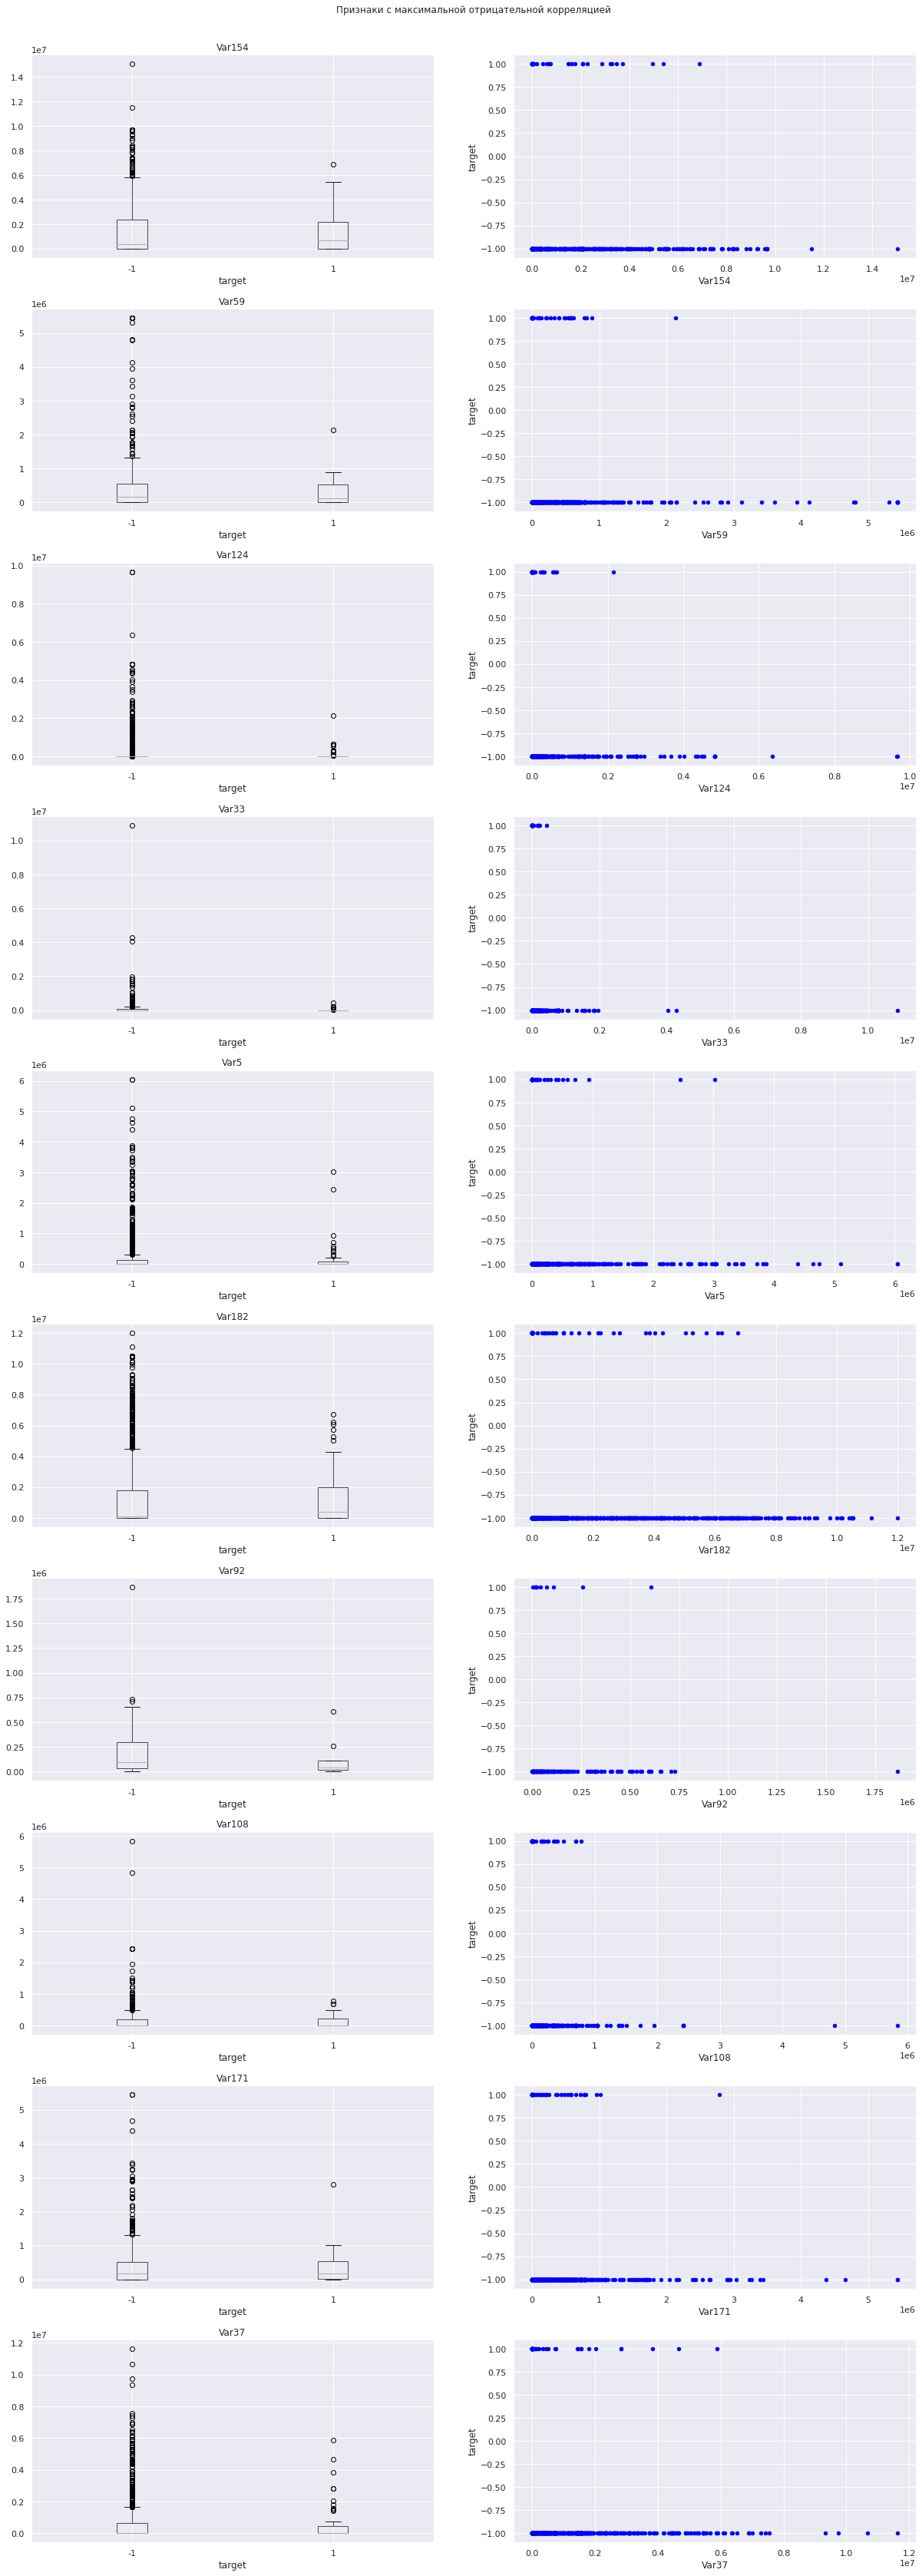

In [24]:
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(20, 60))
fig.subplots_adjust(hspace=0.25)
for i, ax in enumerate(axes):
    col = top_correlated_neg.index.to_list()[i]
    df_train.boxplot(column=col, by='target', ax=ax[0])
    df_train.plot.scatter(x=col, y='target', ax=ax[1], color='blue');
fig.suptitle('Признаки с максимальной отрицательной корреляцией', y=0.915);

5\. Проделайте аналогичные шаги для случайно выбранных 10 числовых признаков.

In [25]:
import random

random_10 = random.sample(range(means.shape[1]), 10)
random_correlated = corrs[random_10]

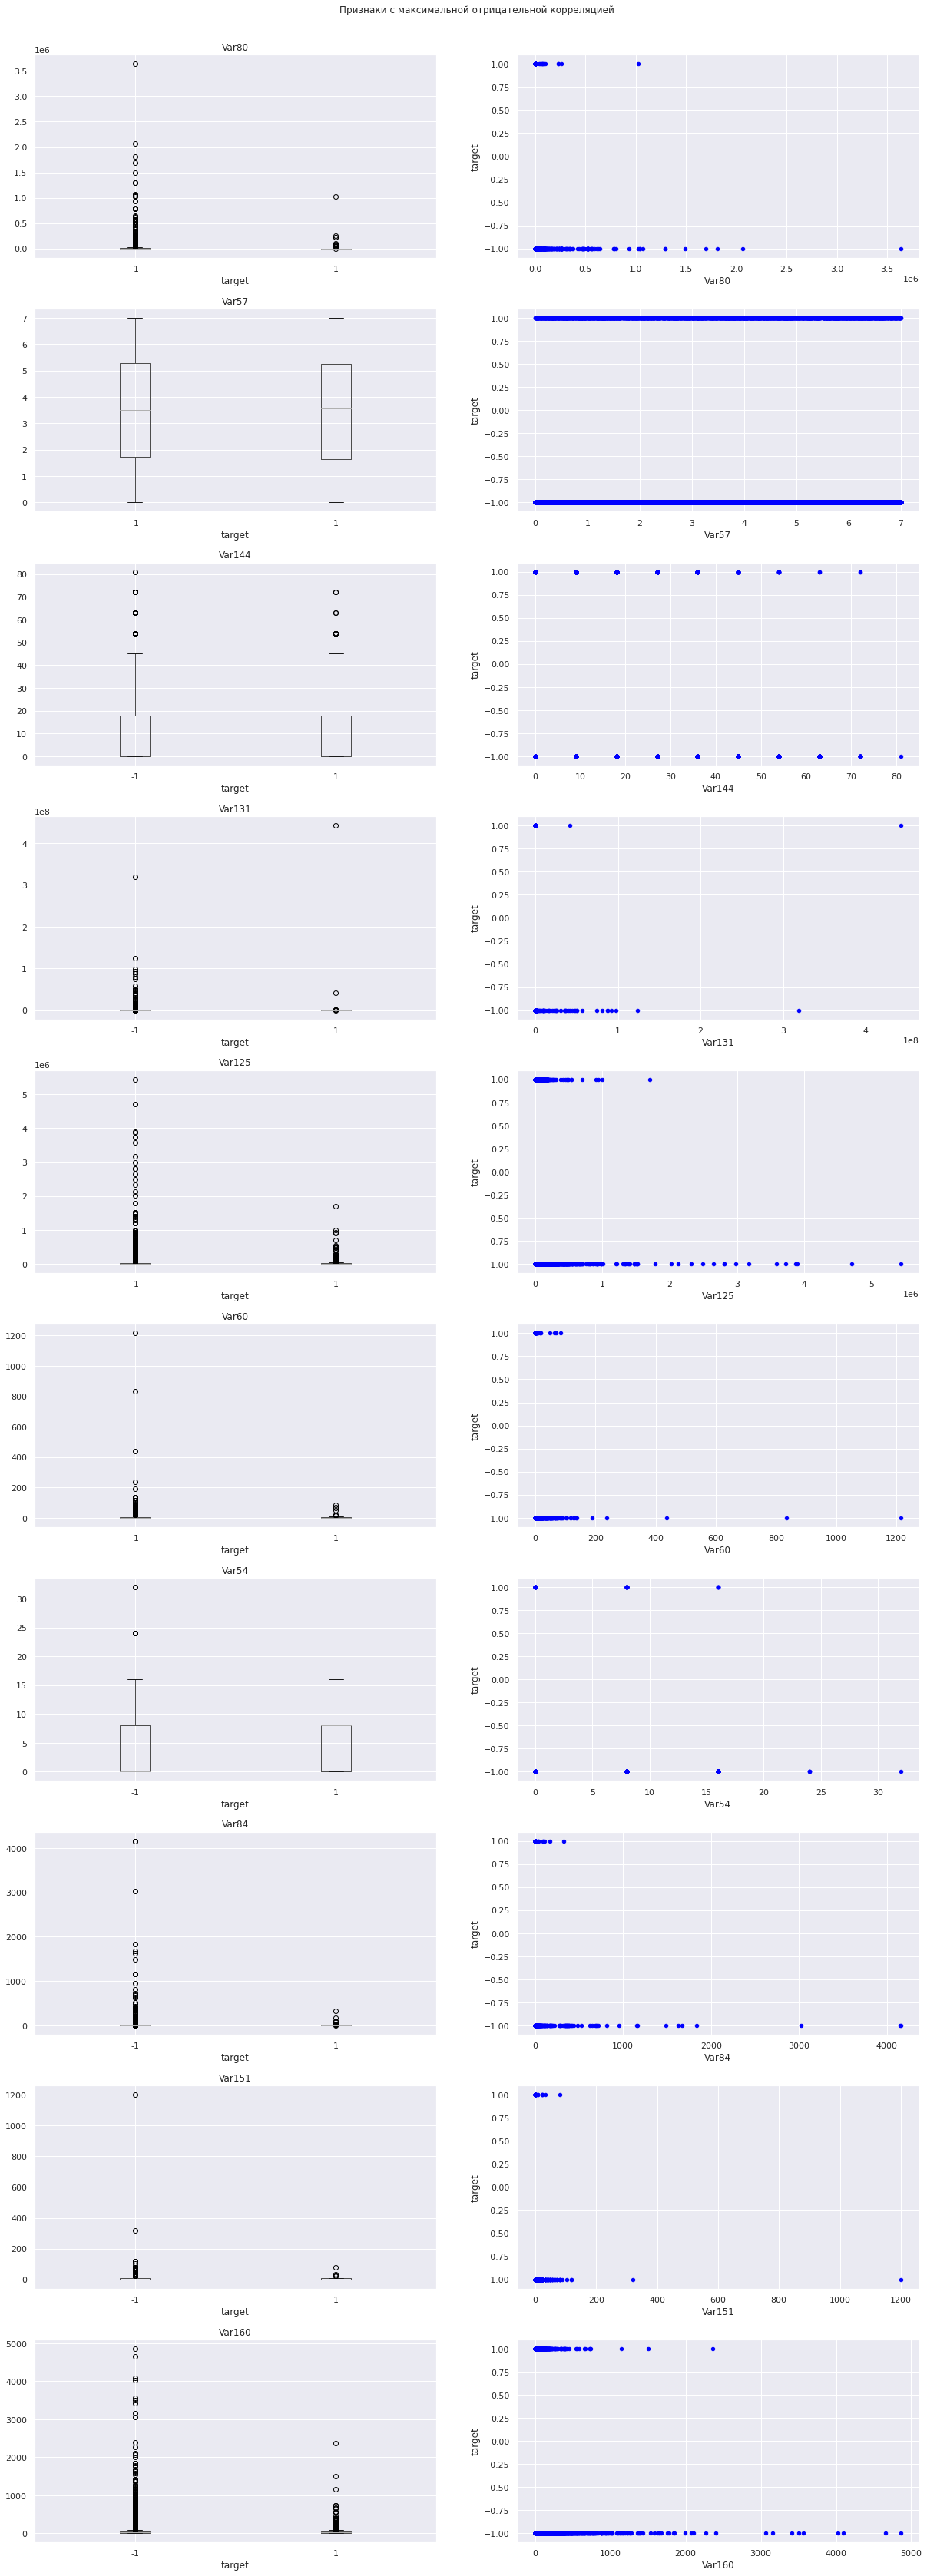

In [26]:
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(20, 60))
fig.subplots_adjust(hspace=0.25)
for i, ax in enumerate(axes):
    col = random_correlated.index.to_list()[i]
    df_train.boxplot(column=col, by='target', ax=ax[0])
    df_train.plot.scatter(x=col, y='target', ax=ax[1], color='blue');
fig.suptitle('Признаки с максимальной отрицательной корреляцией', y=0.915);

6\. Проделайте аналогичные шаги для 10 числовых признаков, наименее сильно коррелирующих с целевой переменной.

In [27]:
less_correlated = corrs.abs().sort_values()[:10]
less_correlated

Var118    0.000000
Var138    0.001639
Var44     0.003251
Var173    0.005087
Var2      0.005181
Var116    0.012817
Var4      0.016095
Var26     0.016762
Var29     0.018692
Var181    0.020968
dtype: float64

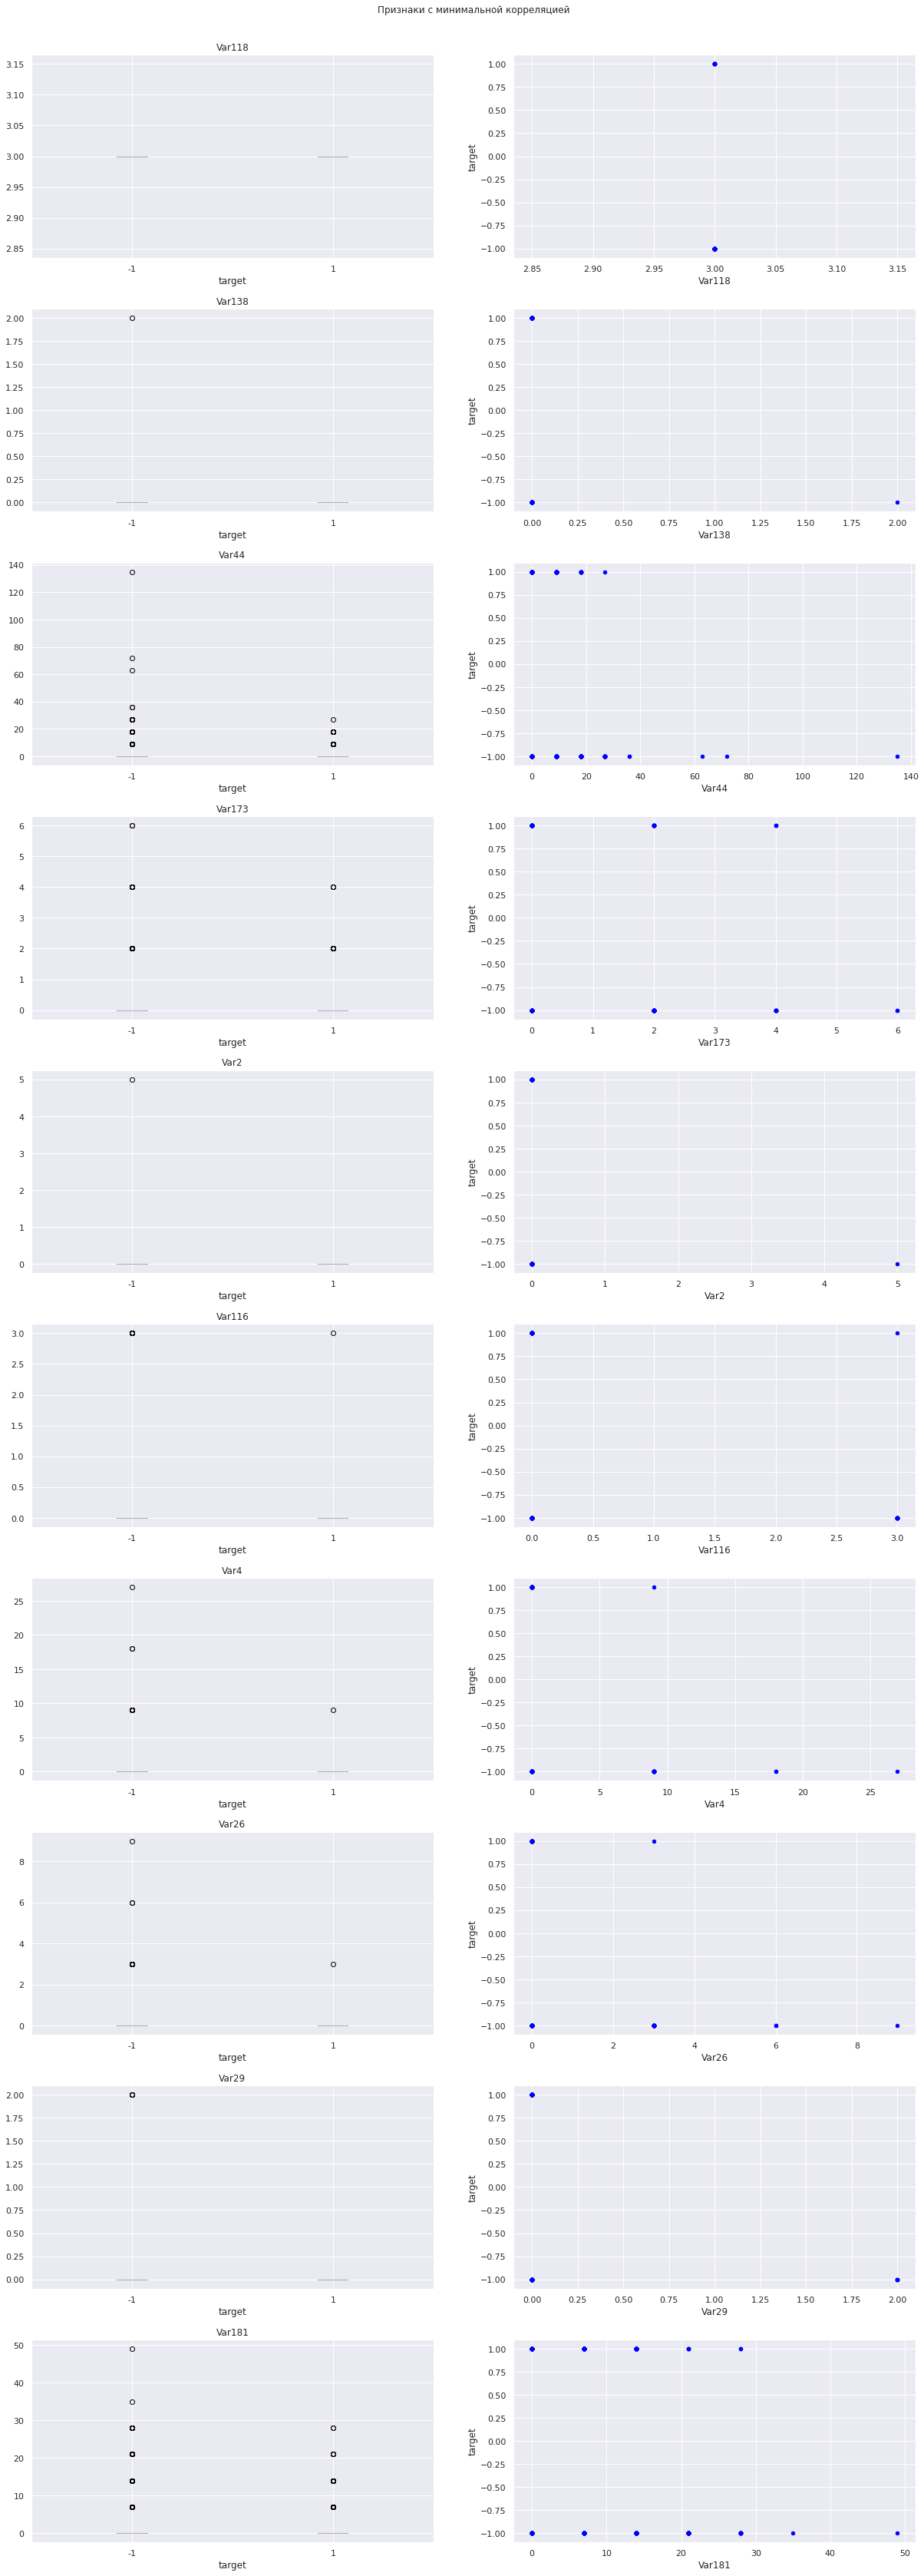

In [28]:
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(20, 60))
fig.subplots_adjust(hspace=0.25)
for i, ax in enumerate(axes):
    col = less_correlated.index.to_list()[i]
    df_train.boxplot(column=col, by='target', ax=ax[0])
    df_train.plot.scatter(x=col, y='target', ax=ax[1], color='blue');
fig.suptitle('Признаки с минимальной корреляцией', y=0.915);

Посмотрим на наиболее частые значения в столбцах

In [29]:
df_num = df_train.select_dtypes(exclude='object')

In [30]:
stats_num = pd.DataFrame(columns=['max_freq_value', 'frequency'])
for col in df_num.columns:
    stats_num.loc[col] = [df_num[col].value_counts().index[0], df_num[col].value_counts().iloc[0]]

In [31]:
stats_num.sort_values(by='frequency', ascending=False)

,max_freq_value,frequency
target,-1.00,37024.0
Var173,0.00,35878.0
Var143,0.00,35668.0
Var44,0.00,35446.0
Var181,0.00,33578.0
...,...,...
Var102,0.00,4.0
Var64,12960.00,4.0
Var190,0.00,4.0
Var45,2985.64,2.0


In [32]:
# наиболее частые значения среди наиболее частых значений
stats_num['max_freq_value'].value_counts()

 0.000000        149
 7.000000          3
 3.000000          3
 9.000000          2
 8.000000          2
 2.000000          2
 6.000000          2
 166.560000        1
 5.000000          1
 2985.640000       1
 2.463576          1
 12960.000000      1
 8225.000000       1
 32.000000         1
 4.000000          1
 247.840000        1
 15.600000         1
 282.000000        1
-1.000000          1
Name: max_freq_value, dtype: int64

In [33]:
# суммарные количества наиболее частых значений
stats_num.groupby('max_freq_value').sum().sort_values('frequency', ascending=False)

,frequency
max_freq_value,
0.000000,457558.0
-1.000000,37024.0
9.000000,34854.0
7.000000,19462.0
3.000000,16788.0
32.000000,8655.0
4.000000,7288.0
166.560000,5727.0
8.000000,2227.0


In [34]:
stats_num['n_uniques'] = df_num.nunique()
stats_num['notna'] = df_num.notna().sum()

In [35]:
stats_num.sort_values('n_uniques')[:20]

,max_freq_value,frequency,n_uniques,notna
Var118,3.0,140.0,1,140
Var27,0.0,1150.0,2,1165
Var29,0.0,565.0,2,570
Var138,0.0,1274.0,2,1275
Var130,0.0,839.0,2,1005
Var90,0.0,568.0,2,570
Var116,0.0,556.0,2,570
target,-1.0,37024.0,2,40000
Var67,0.0,1160.0,2,1165
Var2,0.0,1005.0,2,1006


In [36]:
stats_num.sort_values('n_uniques')[-20:]

,max_freq_value,frequency,n_uniques,notna
Var21,0.000000,1471.0,669,35565
Var22,0.000000,1800.0,669,35984
Var119,0.000000,954.0,1361,35565
Var6,0.000000,798.0,1367,35565
Var13,0.000000,9837.0,2444,35560
Var140,0.000000,10516.0,2452,35560
Var51,0.000000,127.0,2850,2990
Var28,166.560000,5727.0,3759,35983
Var125,0.000000,8167.0,9448,35560
Var149,0.000000,12958.0,15282,34184


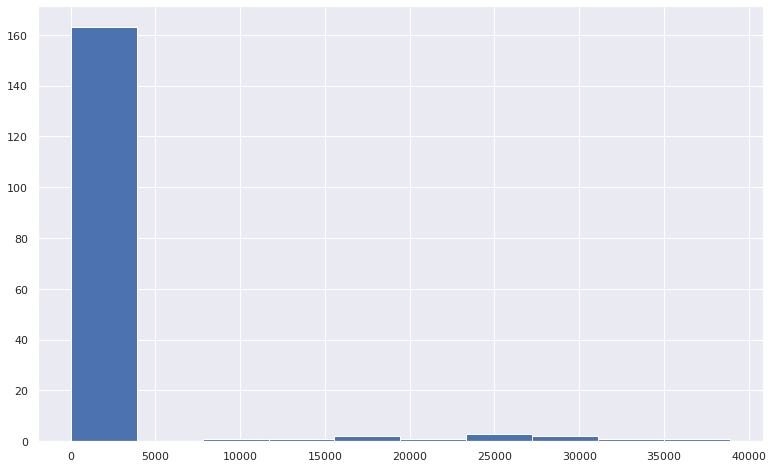

In [39]:
stats_num['n_uniques'].hist();

In [40]:
stats_num = pd.concat([stats_num, df_num.describe().T], axis=1)

In [41]:
stats_num

,max_freq_value,frequency,n_uniques,notna,count,mean,std,min,25%,50%,75%,max
Var1,0.0,312.0,17,570,570.0,11.003509,34.952792,0.00,0.000,0.00,16.00,536.00
Var2,0.0,1005.0,2,1006,1006.0,0.004970,0.157642,0.00,0.000,0.00,0.00,5.00
Var3,0.0,804.0,129,1005,1005.0,429.328358,4470.405915,0.00,0.000,0.00,0.00,130668.00
Var4,0.0,1258.0,4,1275,1275.0,0.148235,1.396054,0.00,0.000,0.00,0.00,27.00
Var5,0.0,706.0,444,1165,1165.0,249055.515021,676202.052802,0.00,0.000,0.00,117215.00,6048550.00
...,...,...,...,...,...,...,...,...,...,...,...,...
Var187,0.0,187.0,49,570,570.0,16.056140,54.965050,0.00,0.000,4.00,14.00,910.00
Var188,15.6,41.0,455,1006,1006.0,165.108310,113.400173,-6.42,19.380,196.41,250.98,628.62
Var189,282.0,503.0,95,16785,16785.0,270.585523,86.723561,6.00,204.000,270.00,330.00,642.00
Var190,0.0,4.0,262,266,266.0,22637.159019,30843.320634,0.00,2419.965,12612.24,32209.56,230427.00


7\. Посмотрите на категориальные переменные: постройте и сравните гистограммы значений категориальных переменных для разных классов.

In [42]:
df_cat = df_train.select_dtypes(include='object')
df_cat

,Var191,Var192,Var193,Var194,Var195,Var196,Var197,Var198,Var199,Var200,...,Var220,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229
0,NaN,NESt0G8EIb,AERks4l,NaN,taul,1K8T,0LaQ,UaKK0yW,I1sFbv_0IT,NaN,...,hLKtJ9p,Al6ZaUT,vr93T2a,LM8l689qOp,NaN,NaN,fKCe,02N6s8f,xwM2aC7IdeMC0,NaN
1,NaN,P1WvyxLp3Z,2Knk1KF,NaN,taul,1K8T,YFAj,Bnunsla,o64y9zI,DlISMzi,...,hN8KpA1,oslk,6hQ9lNX,LM8l689qOp,NaN,ELof,xb3V,RAYp,55YFVY9,mj86
2,NaN,FoxgUHSK8h,LrdZy8QqgUfkVShG,NaN,taul,1K8T,TyGl,fhk21Ss,nQUveAzAF7,NaN,...,4UxGlow,zCkv,catzS2D,LM8l689qOp,NaN,NaN,FSa2,ZI9m,ib5G6X1eUxUn6,mj86
3,NaN,vNEvyxLp3Z,RO12,NaN,taul,1K8T,0Xwj,uoZk2Zj,LWyxgtXeJL,NaN,...,ylCK5YS,oslk,e4lqvY0,LM8l689qOp,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN
4,NaN,4e7gUH7IEC,RO12,NaN,taul,1K8T,vSNn,kugYdIL,ZIXKpoNpqq,NaN,...,PYpzAu9,oslk,MAz3HNj,LM8l689qOp,NaN,NaN,WqMG,RAYp,F2FyR07IdsN7I,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,NaN,IXSgUHShse,RO12,SEuy,taul,1K8T,JLbT,qMlD1gf,CdPgMY1Z52,IjmTVSM,...,U8IVcJ1,oslk,8xSqDjb,LM8l689qOp,NaN,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86
39996,NaN,tr0gUH7ejg,RO12,NaN,taul,1K8T,lK27,Wtcr3WP,qzIoq9b,NaN,...,5ZxD5lR,oslk,WUmqPCU,LM8l689qOp,NaN,NaN,WqMG,RAYp,F2FyR07IdsN7I,NaN
39997,NaN,C2Dvyx875g,RO12,NaN,taul,1K8T,487l,FZVtMxl,LH0kFz12FM,hDyVP2J,...,B9vNioI,oslk,pHOw_BK,LM8l689qOp,NaN,ELof,WqMG,RAYp,F2FyR07IdsN7I,am7c
39998,NaN,dTGmfo8zhV,RO12,NaN,taul,1K8T,487l,gRinF0C,e1XhvTunuD,NaN,...,SCnYWu3,oslk,WC7Esaq,LM8l689qOp,NaN,NaN,wX53,RAYp,F2FyR07IdsN7I,NaN


In [43]:
stats_cat =  df_cat.describe().T

In [52]:
stats_cat.sort_values('freq', ascending=False)

,count,unique,top,freq
Var196,40000,4,1K8T,39633
Var195,40000,23,taul,38353
Var210,40000,6,uKAI,38084
Var208,39877,2,kIsH,36823
Var203,39877,5,9_Y1,36192
Var211,40000,2,L84s,32215
Var219,35804,22,FzaX,32191
Var221,40000,7,oslk,29610
Var223,35804,4,LM8l689qOp,29279
Var193,40000,50,RO12,28817


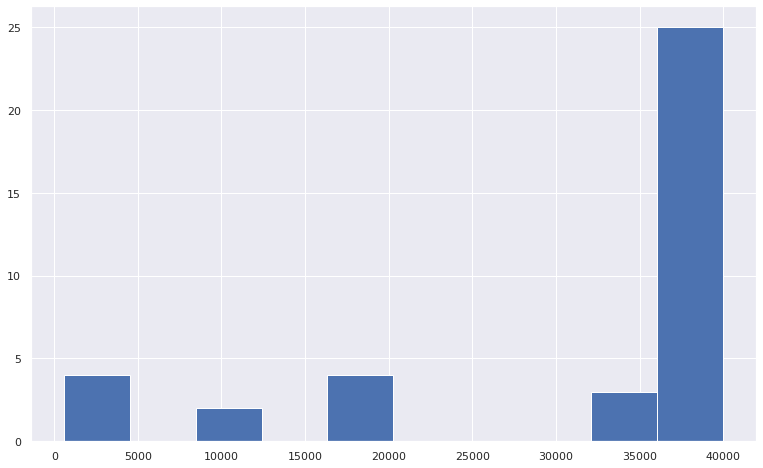

In [46]:
stats_cat['count'].hist();

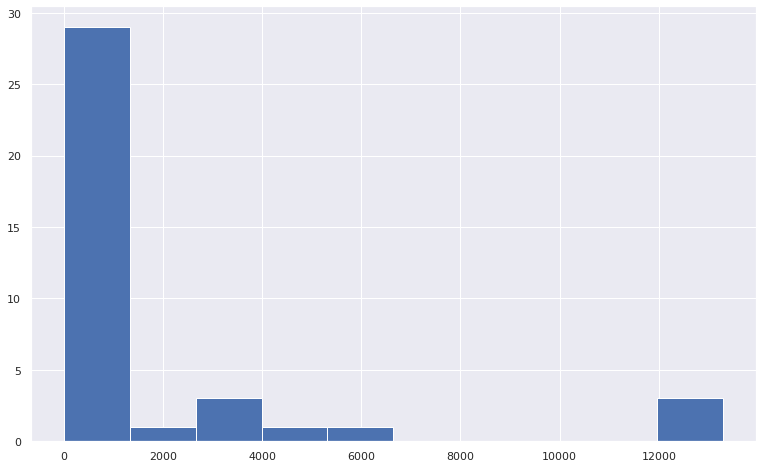

In [53]:
stats_cat['unique'].hist();

In [11]:
def cramers_v(x, y):
    '''
    V Крамера (корреляция категориальных признаков)
    '''
    import scipy.stats as ss
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [12]:
cat_corrs = pd.Series()
for col in df_cat.columns:
    corr = cramers_v(df_train[col], df_train.target)
    if not np.isnan(corr):
        cat_corrs.loc[col] = corr
stats_cat['target_corr'] = cat_corrs

In [13]:
stats_cat.sort_values('target_corr', ascending=False)

,count,unique,top,freq,target_corr
Var199,39996,4400,r83_sZi,746,0.237375
Var192,39709,354,DHeq9ayfAo,313,0.116264
Var216,40000,1819,mAjbk_S,3929,0.083442
Var206,35565,21,IYzP,13854,0.077436
Var212,40000,78,NhsEn4L,23433,0.075150
Var205,38453,3,VpdQ,25612,0.073484
Var228,40000,30,F2FyR07IdsN7I,26211,0.070617
Var193,40000,50,RO12,28817,0.060861
Var207,40000,14,me75fM6ugJ,28047,0.055418
Var227,40000,7,RAYp,28112,0.054255


In [23]:
pd.crosstab(df_cat['target'], df_cat['Var205'])

Var205,09_Q,VpdQ,sJzTlal
target,,,
-1,8606,23875,3125
1,626,1737,484


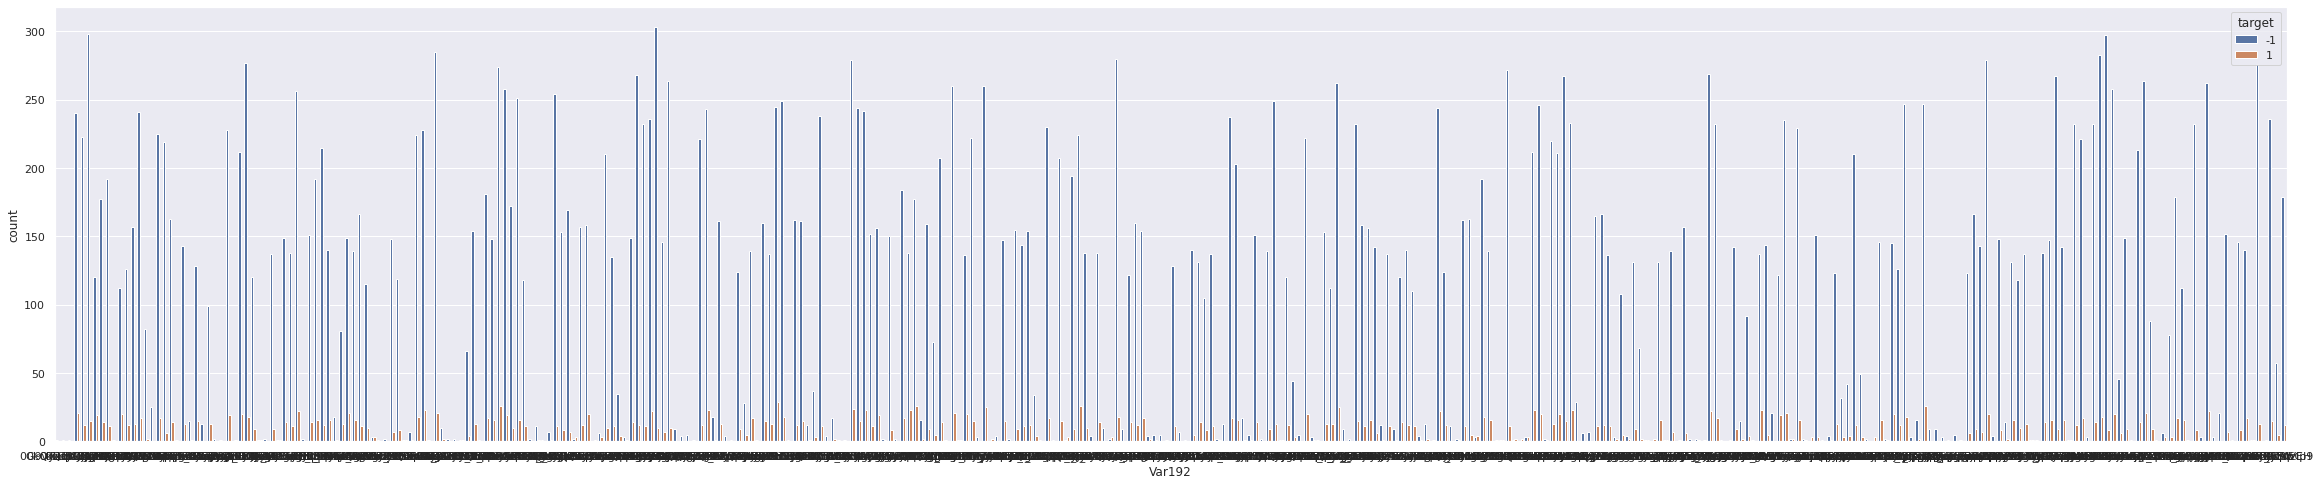

In [50]:
sns.countplot(x='Var192', hue='target', data=df_cat);

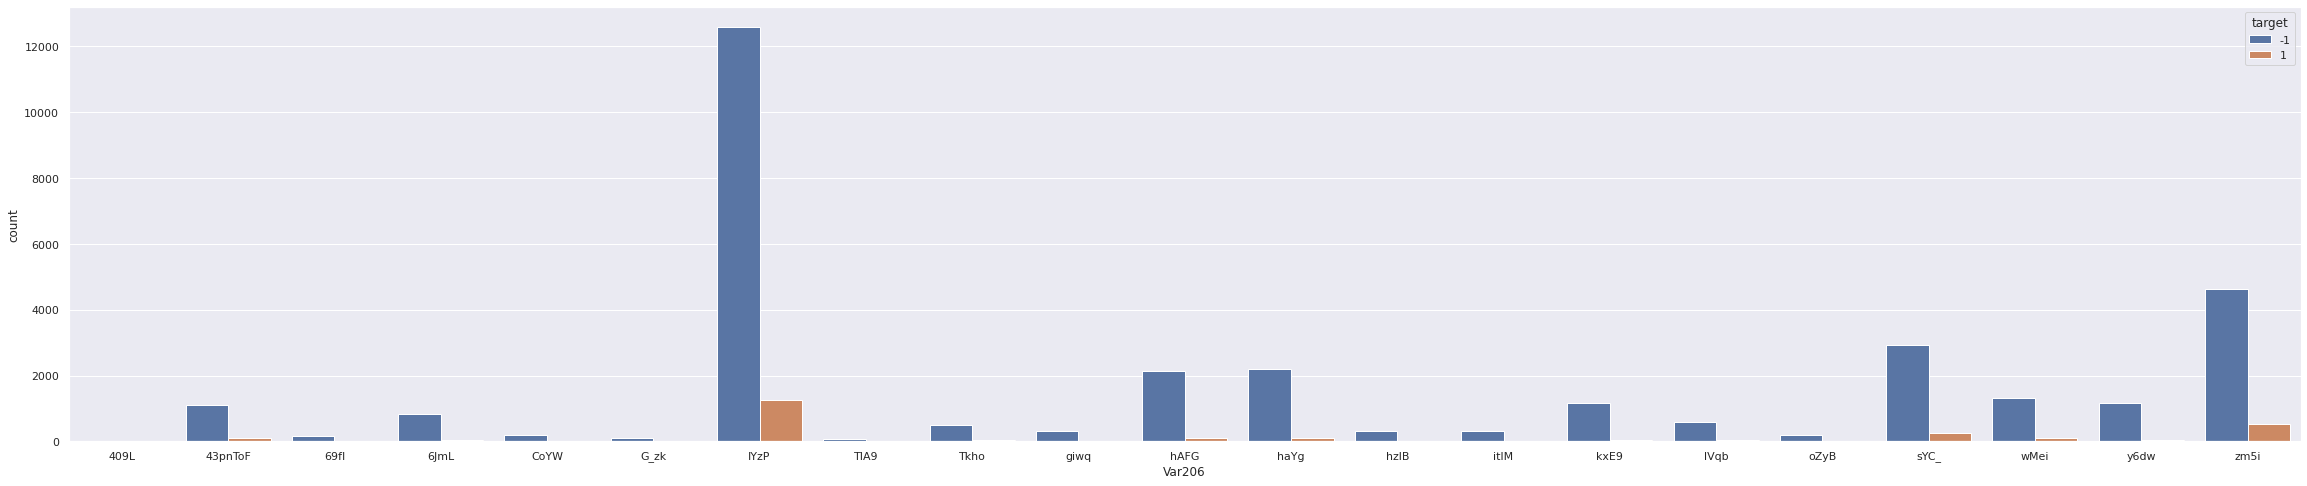

In [45]:
sns.countplot(x='Var206', hue='target', data=df_cat);

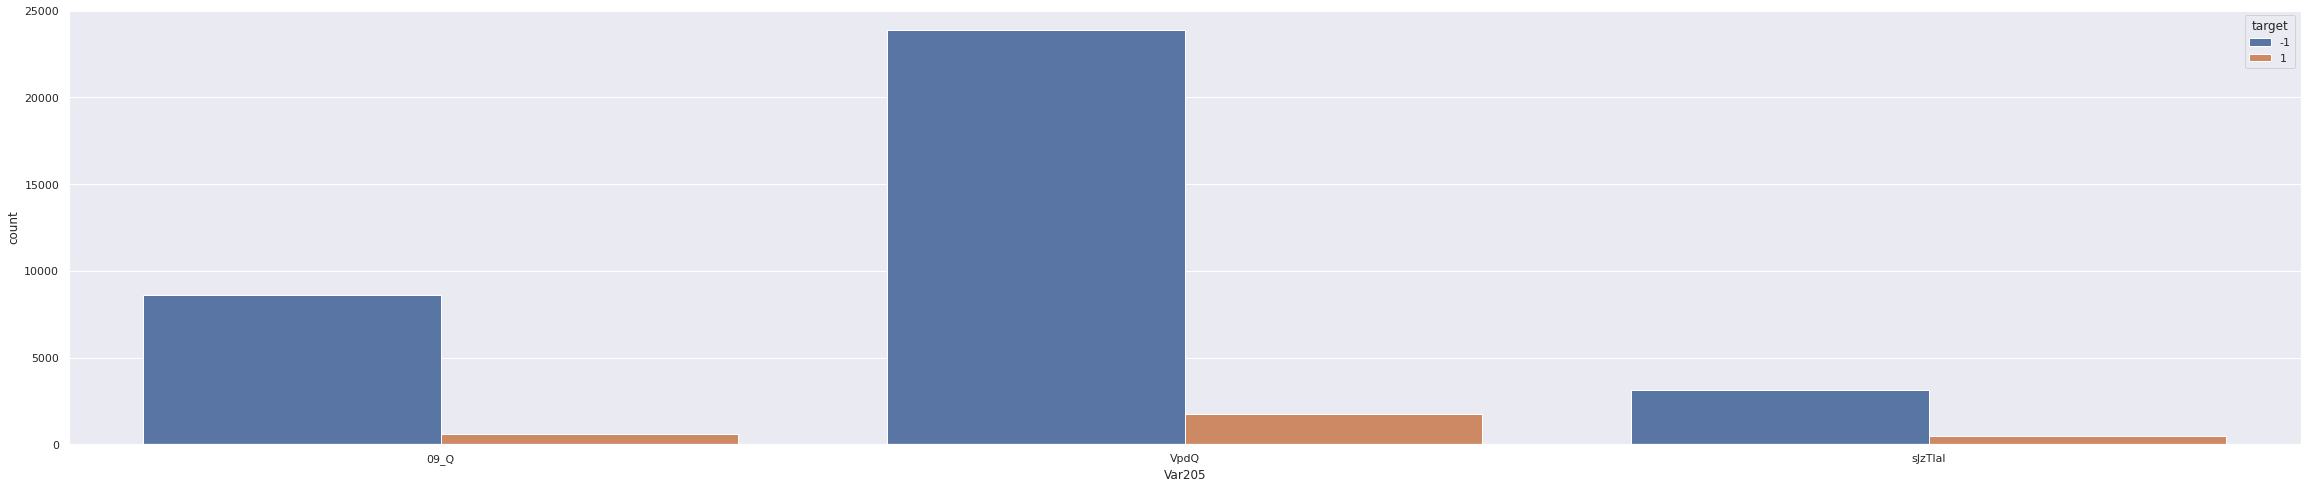

In [49]:
sns.countplot(x='Var205', hue='target', data=df_cat);

In [47]:
df_cat['target'] = labels_train

In [48]:
df_cat = df_cat.astype('category')

8\. Проанализируйте полученные результаты:
* Какие выводы вы можете сделать? Заметили ли вы какие-нибудь интересные закономерности?
* На основании полученных изображений и таблиц, предположите, какие переменные окажут наибольшее влияние (вклад) в модель?
* Какие переменные на ваш взгляд окажутся наименее полезными, шумовыми?
* Как вы думаете, окажется ли отбор признаков полезным для построения модели?

Были проанализированы числовые и категориальные переменные.
Целевой класс несбалансрован. Значений Отток гораздо меньше значения Не отток.
У признаков имеются пропуски: незапполненные значения. Число NaN'ов варьируется.
Числовые: большинство имеют около 1000 значений.
149 призанков имеют наиболее частое значение 0. Всего 0 встречается 457558 раз. Вероятно 0 - отсутствие значения.
Большинство имеют меньее 5000 уникальных значений.
Категориальные: большинство имеют почти 40000 непропущенных значений. Уникальных значение - до 1000.

Наибольшее значение могут оказать признаки с максимальными значениями корреляции с целевой переменной.

Признаки с полностью отсутствующими значениями можно убрать, так как они не несут никакой информации.
Признаки с очень малым количеством значений также стоит убрать, если не получится придумать подходящую стратегию замены NaN'ов.
Признаки с единственным уникальным значением также можно отнести к шумовым.
Признаки с наименьшими значениями корреляции с целевым признаком - аналогично.

Отбор шумовых признаков может привести к улучшению качества модели.